In this notebook, we perform the preprocessing of the dataset "data-science-bootcamp/content/datasets/classification/raw/data_50.csv". The output of this notebook will be written in the folder "data-science-bootcamp/content/datasets/classification/processed" as four separated csv files: X_train.csv, X_test.csv, y_train.csv, y_test.csv. (These files will be used as input for the ML algorithms which are discussed in the next sessions of the bootcamp).

The dataset is a modified version of Kaggle House Prices dataset availabel at "https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv". The modifications, including reducing the number of features and adding a number of derived columns, are done for the pedagogical reasons of demonstrating different methods of preprocessing and feature engineering.
This regression dataset contains 49 different attributes of the houses and 1 positive real-valued column "SalePrice" which is the target column to be predicted by the regression ML model. 

0. Exploratory Data Analysis (EDA)\
0.1. Loading the data into a dataframe\
0.2. transforming the label column
1. Missing Value Imputation\
1.1. Identifying columns with null values \
1.2. Complete Case Analysis\
1.3. Mean or Median Imputation \
1.4. Frequent Category Imputation (Mode Imputation)
2. Temporal variables
3. Categorical encoding\
3.1. Label Encoding \
3.2. Count or frequency Encoding\
3.3. One Hot Encoding 
4. Handling Outliers\
4.1. Identifying the outliers \
4.2. Outlier trimming \
4.3. Outlier Capping
5. Feature Scaling\
5.2. Standardization \
5.2. Min-Max Scaling
6. Feature Selection\
6.1. Dropping Constant Features \
6.2. Correlation-based Feature Selection\
6.2.a Selecting Features with low correlations with other features\
6.2.b Selecting Features with hight correlations with Target
7. Saving the preprocessed dataset


# 0. Exploratory Data Analysis (EDA)
0.1. Loading the data into a dataframe\
0.2. transforming the label column

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None) 
import warnings
warnings.filterwarnings('ignore')

### 0.1 Loading the data into a dataframe

In [6]:
# loading the dataset "regression_50.csv" into a dataframe called "df"
df= pd.read_csv('../datasets/regression/raw/regression_50.csv', sep= ",", encoding= "utf-8") 

In [7]:
# display the dataframe
df.head()

,LotFrontage,LotArea,Alley,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,isNew,YearRemodAdd,RoofStyle,RoofMatl,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,firstFlrSF,secondFlrSF,GrLivArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,hasGarage,GarageArea,GarageCond,WoodDeckSF,Nr.Ring,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SalePrice
0,65.0,8450,NaN,Inside,Gtl,CollgCr,1Fam,2Story,7,5,2003,True,2003,Gable,CompShg,Gd,TA,PConc,856,GasA,Ex,Y,SBrkr,856,854,1710,Gd,TA,No,1,2,1,3,Gd,8,0,NaN,2,True,548,TA,0,2,61,NaN,NaN,NaN,2,2008,208500
1,80.0,9600,NaN,FR2,Gtl,Veenker,1Fam,1Story,6,8,1976,False,1976,Gable,CompShg,TA,TA,CBlock,1262,GasA,Ex,Y,SBrkr,1262,0,1262,Gd,TA,Gd,0,2,0,3,TA,6,1,TA,2,True,460,TA,298,2,0,NaN,NaN,NaN,5,2007,181500
2,68.0,11250,NaN,Inside,Gtl,CollgCr,1Fam,2Story,7,5,2001,True,2002,Gable,CompShg,Gd,TA,PConc,920,GasA,Ex,Y,SBrkr,920,866,1786,Gd,TA,Mn,1,2,1,3,Gd,6,1,TA,2,True,608,TA,0,2,42,NaN,NaN,NaN,9,2008,223500
3,60.0,9550,NaN,Corner,Gtl,Crawfor,1Fam,2Story,7,5,1915,False,1970,Gable,CompShg,TA,TA,BrkTil,756,GasA,Gd,Y,SBrkr,961,756,1717,TA,Gd,No,1,1,0,3,Gd,7,1,Gd,3,True,642,TA,0,2,35,NaN,NaN,NaN,2,2006,140000
4,84.0,14260,NaN,FR2,Gtl,NoRidge,1Fam,2Story,8,5,2000,False,2000,Gable,CompShg,Gd,TA,PConc,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,Gd,TA,Av,1,2,1,4,Gd,9,1,TA,3,True,836,TA,192,2,84,NaN,NaN,NaN,12,2008,250000


In [4]:
# check the shape of the dataframe as a 2-dimensional data object (#rows, #columns)
df.shape

(1460, 50)

The dataset contains 1460 records (rows) and 50 columns (features + target):

The target column (y) is called target.
The rest 49 columns (X) are our feature vectors.

In [5]:
# storing the target in a variable called "target", and the rest of columns' names in a variable called "X"
target = "SalePrice"
X = list(set(df.columns) - set([target])) 

### 0.2. transforming the label column

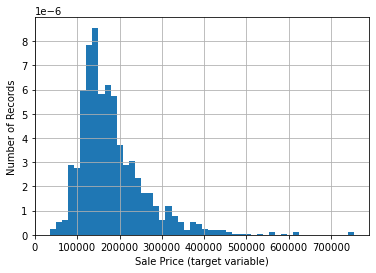

In [6]:
# let us first look at the distribution of our target column
df[target].hist(bins=50, density=True)
plt.ylabel("Number of Records")
plt.xlabel("Sale Price (target variable)")
plt.show()

In [7]:
# target has a skewed distribution with positive values
# We transform the values using the log function to obtain a normal distribution
df[target] = np.log(df[target])

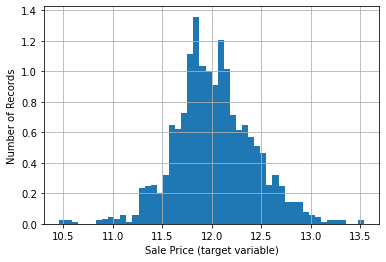

In [8]:
df[target].hist(bins=50, density=True)
plt.ylabel("Number of Records")
plt.xlabel("Sale Price (target variable)")
plt.show()

In [9]:
# We first have a look at the data types of all columns
df_type = pd.DataFrame(df.dtypes)
df_type

,0
LotFrontage,float64
LotArea,int64
Alley,object
LotConfig,object
LandSlope,object
Neighborhood,object
BldgType,object
HouseStyle,object
OverallQual,int64
OverallCond,int64


In [10]:
# we can get a list of all columns by the following command
df.columns

Index(['LotFrontage', 'LotArea', 'Alley', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'isNew', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'ExterQual', 'ExterCond', 'Foundation', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'firstFlrSF', 'secondFlrSF',
       'GrLivArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageCars', 'hasGarage', 'GarageArea',
       'GarageCond', 'WoodDeckSF', 'Nr.Ring', 'OpenPorchSF', 'PoolQC', 'Fence',
       'MiscFeature', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [11]:
print("Number of columns:", len(df.columns))

Number of columns: 50


In [12]:
# classifying columns with different data types:
str_cols = []
for col, dtype in df.dtypes.to_dict().items():
    if str(dtype) in 'object':
        str_cols.append(col)

print("Number of String Columns:", len(str_cols))

num_cols = []
for col, dtype in df.dtypes.to_dict().items():
    if str(dtype) in 'int64' or str(dtype) in 'float64':
        num_cols.append(col)
print("Number of Numerical Columns:", len(num_cols))

bool_cols = []
for col, dtype in df.dtypes.to_dict().items():
    if str(dtype) in 'bool':
        bool_cols.append(col)

print("Number of Boolean Columns:", len(bool_cols))


Number of String Columns: 24
Number of Numerical Columns: 24
Number of Boolean Columns: 2


In [13]:
# Exploring different categories of the categorical variables:
for col in str_cols:
    print(col, ": ", df[col].unique())

Alley :  [nan 'Grvl' 'Pave']
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
ExterQual :  ['Gd' 'TA' 'Ex' 'Fa']
ExterCond :  ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation :  ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
Heating :  ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
HeatingQC :  ['Ex' 'Gd' 'TA' 'Fa' 'Po']
CentralAir :  ['Y' 'N']
Electrical :  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
BsmtQual 

# 1. Missing Value Imputation
It happens very often that the dataset contains missing (empty, null) values.

Imputation is the process of replacing missing data with statistical estimates of them.

In this section, we explore different methods of missing data imputation. It consists of the following parts:

1.1. Identifying columns with null values \
1.2. Mean or Median Imputation \
1.3. Frequent Category Imputation (Mode Imputation)


### 1.1. Identifying columns with null values: 

The main method in Pandas which is used to identify columns with null values is called "isnull()".

"isnull()" is applied to a column in a dataframe and returns an array of bool, indicating whether each record is null or not.

In [14]:
# For example, consider the column "MiscFeature"
df["MiscFeature"].isnull()

0        True
1        True
2        True
3        True
4        True
        ...  
1455     True
1456     True
1457    False
1458     True
1459     True
Name: MiscFeature, Length: 1460, dtype: bool

Now we would like to identify those columns which contain null values.

We use the mean() method to calculate the mean of the 0's and 1's. If the mean is greater than 0, the column contains at least one null value 

In [15]:
null_cols = [col for col in df.columns if df[col].isnull().mean() > 0] 
null_str_cols = [col for col in str_cols if df[col].isnull().mean() > 0] 
null_num_cols = [col for col in num_cols if df[col].isnull().mean() > 0]
null_bool_cols = [col for col in bool_cols if df[col].isnull().mean() > 0]  

In [16]:
print(null_cols)

['LotFrontage', 'Alley', 'Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'FireplaceQu', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [17]:
print("Number of Columns with Null values:", len(null_cols))
print("Percentage of null values:")
for col in null_cols:
    print(col, round(df[col].isnull().mean(), 4), ", Data Type: ", df[col].dtype)

Number of Columns with Null values: 11
Percentage of null values:
LotFrontage 0.1774 , Data Type:  float64
Alley 0.9377 , Data Type:  object
Electrical 0.0007 , Data Type:  object
BsmtQual 0.0253 , Data Type:  object
BsmtCond 0.0253 , Data Type:  object
BsmtExposure 0.026 , Data Type:  object
FireplaceQu 0.4726 , Data Type:  object
GarageCond 0.0555 , Data Type:  object
PoolQC 0.9952 , Data Type:  object
Fence 0.8075 , Data Type:  object
MiscFeature 0.963 , Data Type:  object


As mentioned above, there are different methods for missing data imputation.

To implement these methods, we create two sublist of null_cols whose percentage of null values is lower and higher than a certain "null_threshold".

There is no definite rule how to choose this threshold. It must be chosen in such a way that the dataset size and feature distributions do not change drastically after imputation.

In [18]:
null_threshold = 0.028
#null_threshold = 0.2
# Create a sublist of null_cols with less than "null_threshold" null values
null_lower_cols = [col for col in null_cols if df[col].isnull().mean() < null_threshold] 
null_lower_str_cols = [col for col in null_str_cols if df[col].isnull().mean() < null_threshold]
null_lower_num_cols = [col for col in null_num_cols if df[col].isnull().mean() < null_threshold] 
null_lower_bool_cols = [col for col in null_bool_cols if df[col].isnull().mean() < null_threshold] 
#Columns with more than "null_threshold" percent null values.
null_upper_cols = list(set(null_cols) - set(null_lower_cols)) 
null_upper_str_cols = list(set(null_str_cols) - set(null_lower_str_cols)) 
null_upper_num_cols = list(set(null_num_cols) - set(null_lower_num_cols)) 
null_upper_bool_cols = list(set(null_bool_cols) - set(null_lower_bool_cols)) 

In [19]:
print("Number of columns with null values:", len(null_cols))

Number of columns with null values: 11


In [20]:
print("Number of columns with less than ", null_threshold, "null values:", len(null_lower_cols))
for col in null_lower_cols:
    print(col, round(df[col].isnull().mean(), 4), ", Data Type: ", df[col].dtype)

Number of columns with less than  0.028 null values: 4
Electrical 0.0007 , Data Type:  object
BsmtQual 0.0253 , Data Type:  object
BsmtCond 0.0253 , Data Type:  object
BsmtExposure 0.026 , Data Type:  object


In [21]:
print("Number of columns with more than ", null_threshold, "null values:", len(null_upper_cols))
for col in null_upper_cols:
    print(col, round(df[col].isnull().mean(), 4), ", Data Type: ", df[col].dtype)

Number of columns with more than  0.028 null values: 7
GarageCond 0.0555 , Data Type:  object
LotFrontage 0.1774 , Data Type:  float64
MiscFeature 0.963 , Data Type:  object
Alley 0.9377 , Data Type:  object
Fence 0.8075 , Data Type:  object
FireplaceQu 0.4726 , Data Type:  object
PoolQC 0.9952 , Data Type:  object


### 1.2. Complete Case Analysis

The first method of handling missing values is to drop all the records which contains a missing value. We perform this method on the columns that we stored in "null_lower_cols".

The main method in Pandas which is used to drop columns with null values is called "dropna()".


In [22]:
print(null_lower_cols)

['Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure']


In [23]:
# Here we simply drop all records which contain with less than the percentage specified in the null_threshold variable of their values being null
# We store the resulting data into a new dataframe called "df_cca"
df_cca = df.dropna(subset=null_lower_cols,  axis=0)
df.shape, df_cca.shape

((1460, 50), (1421, 50))

In [24]:
print("We observe that after dropping the missing values, the number of records is reduced to", df_cca.shape[0],".")
print("This means the dataset size is reduced by", round((df.shape[0] - df_cca.shape[0])/df.shape[0] * 100, 2), "percent.")


We observe that after dropping the missing values, the number of records is reduced to 1421 .
This means the dataset size is reduced by 2.67 percent.


Since the dataset size is not reduced 
In order to check the distortion of feature distributions, we plot the histogram of the imputed features against the original features.

<AxesSubplot:>

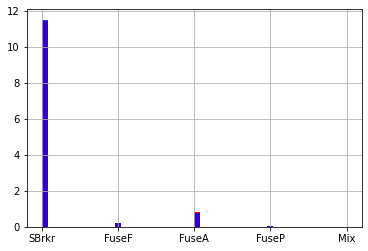

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Electrical'].hist(bins=50, ax=ax, density=True, color='red', )
df_cca['Electrical'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:>

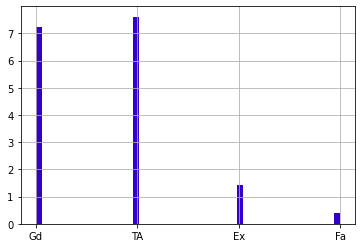

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['BsmtQual'].hist(bins=50, ax=ax, density=True, color='red')
df_cca['BsmtQual'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:>

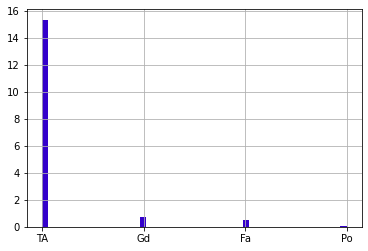

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['BsmtCond'].hist(bins=50, ax=ax, density=True, color='red')
df_cca['BsmtCond'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:>

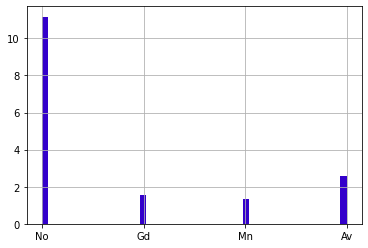

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['BsmtExposure'].hist(bins=50, ax=ax, density=True, color='red')
df_cca['BsmtExposure'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

We observe that the distributions of the values of imputed features is not distorted. We therefore implement the imputation on our main dataframe "df".

In [29]:
# drop the records with at least one null value
df = df.dropna(subset=null_lower_cols,  axis=0) 

We have already handled 4 null columns. There are 7 more remained which are stored in the list "null_upper_cols".

In [30]:
for col in null_upper_cols:
    print(col, round(df[col].isnull().mean(), 4), ", Data Type: ", df[col].dtype)

GarageCond 0.0521 , Data Type:  object
LotFrontage 0.178 , Data Type:  float64
MiscFeature 0.9641 , Data Type:  object
Alley 0.9367 , Data Type:  object
Fence 0.8051 , Data Type:  object
FireplaceQu 0.4652 , Data Type:  object
PoolQC 0.9951 , Data Type:  object


Among the remaining columns:
- 1 is numerical = ["LotFrontage"] with 17.8% null values --> perform Mean/Median
- 6 are categorical:
    - 1 feature = ["GarageCond"] with 5.2 % null values --> perform Frequent Category Imputation
    - 5 features = ["MiscFeature", "PoolQC", "FireplaceQu", "Alley", "Fence"] with > 46 % null values --> perform "add a Missing category".

### 1.3. Mean or Median Imputation

Mean or Median Imputation amounts to replacing all missing values by mean or median of that variable.

The main method in Pandas which is used to drop columns with null values is called "fillna()".

Depending on the feature distributions, we can choose which one to choose:

- for symmetric distributions, mean imputation
- for skewed distributions, median imputation


Before implementing the imputations, we must first split the data to train and test datasets (to avoid overfitting).

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X], df[target], test_size=0.3, random_state=10)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((994, 49), (427, 49), (994,), (427,))

<AxesSubplot:ylabel='Density'>

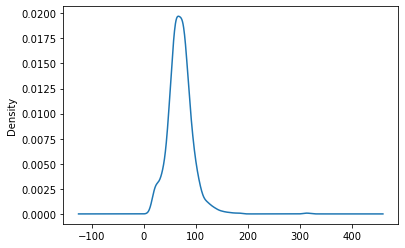

In [33]:
# we first look at the distribution plot of 'LotFrontage'
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)

Since it has a skewed distribution, we choose the median imputation.

In [34]:
# first store the median of X_train['LotFrontage'] in the variable "LotFrontage_median"
LotFrontage_median = X_train['LotFrontage'].median()
# we add new columns to X_train/X_test where the null value is filled with median
X_train['LotFrontage_median'] = X_train['LotFrontage'].fillna(LotFrontage_median)
X_test['LotFrontage_median'] = X_test['LotFrontage'].fillna(LotFrontage_median)

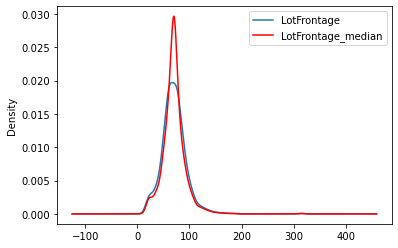

In [35]:
# we now plot the distributions of X_train['LotFrontage'] and X_train['LotFrontage_median'] together
fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
X_train['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

We observe that the general shape of the distribution os not distored. Obviously the value of the mode is increased, relecting the fact that we have filled the null values with median and thus there are more points in the dataset whose values are equal the median (of the original distruíbution). 

In [36]:
# after plotting this, we keep X_train['LotFrontage_median'] and drop X_train['LotFrontage'].
X_train.drop(columns=['LotFrontage'], axis=1, inplace=True)
X_test.drop(columns=['LotFrontage'], axis=1, inplace=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((994, 49), (427, 49), (994,), (427,))

### 1.4. Frequent Category Imputation (Mode Imputation)

Frequent Category Imputation amounts to replacing all missing values by the most frequent value (mode) of that variable.

The main method in Pandas which is used to drop columns with null values is called "fillna()".

We implement this method for the categorical column "GarageCond".

<AxesSubplot:>

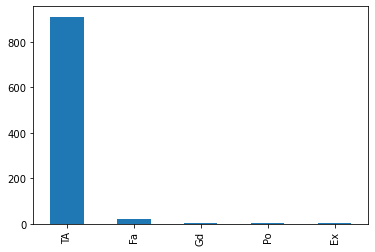

In [37]:
# plot the bar-plot of X_train['GarageCond'] 
X_train['GarageCond'].value_counts().sort_values(ascending=False).plot.bar()

In [38]:
GarageCond_mode =  X_train['GarageCond'].mode()[0]   
GarageCond_mode                           

'TA'

In [39]:
X_train["GarageCond"].fillna(GarageCond_mode, inplace=True)
X_test["GarageCond"].fillna(GarageCond_mode, inplace=True)

<AxesSubplot:>

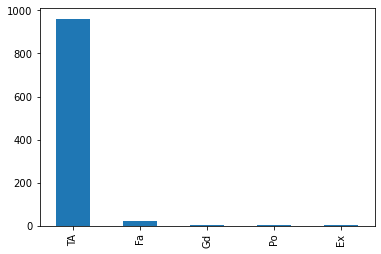

In [40]:
# plot the bar-plot of X_train['GarageCond'] 
X_train['GarageCond'].value_counts().sort_values(ascending=False).plot.bar()

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((994, 49), (427, 49), (994,), (427,))

# Adding a "Missing" category 

This Imputation method amounts to creating a new category called "Missing" and replacing all null values by this new label. 

This is used when the percentage of null values in a column is high.

In our case, we use this method for the remaining 5 categorical columns ["MiscFeature", "PoolQC", "FireplaceQu", "Alley", "Fence"] whose null value percentage is higher than 46%.


In [42]:
add_missing_cols = ["MiscFeature", "PoolQC", "FireplaceQu", "Alley", "Fence"]

In [43]:
for col in add_missing_cols:
    print(X_train[col].unique())

[nan 'Shed' 'Gar2' 'Othr']
[nan 'Gd' 'Fa' 'Ex']
['Gd' nan 'TA' 'Fa' 'Ex' 'Po']
[nan 'Pave' 'Grvl']
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


In [44]:
for col in add_missing_cols:
    X_train[col].fillna('Missing', inplace=True)
    X_test[col].fillna('Missing', inplace=True)

<AxesSubplot:>

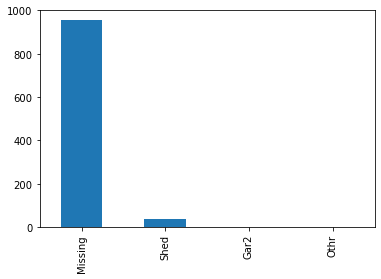

In [45]:
X_train['MiscFeature'].value_counts().sort_values(ascending=False).plot.bar()

In [46]:
for col in add_missing_cols:
    print(X_train[col].unique())

['Missing' 'Shed' 'Gar2' 'Othr']
['Missing' 'Gd' 'Fa' 'Ex']
['Gd' 'Missing' 'TA' 'Fa' 'Ex' 'Po']
['Missing' 'Pave' 'Grvl']
['Missing' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


In [47]:
X_train.shape, X_test.shape, y_train.shape

((994, 49), (427, 49), (994,))

# 2. Temporal variables

There are 3 temporal variables in the dataset ["YrSold", "YearRemodAdd", "YearBuilt"]

In [48]:
df[["YrSold", "YearBuilt", "YearRemodAdd"]]

,YrSold,YearBuilt,YearRemodAdd
0,2008,2003,2003
1,2007,1976,1976
2,2008,2001,2002
3,2006,1915,1970
4,2008,2000,2000
...,...,...,...
1455,2007,1999,2000
1456,2010,1978,1988
1457,2010,1941,2006
1458,2010,1950,1996


Text(0, 0.5, 'Sale price mean')

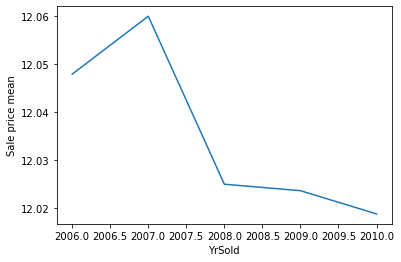

In [49]:
# we plot the mean of target for each "YrSold"
df.groupby("YrSold")[target].mean().plot()
plt.ylabel("Sale price mean")

We observe that the Sales Price drops as the year grows!

Text(0, 0.5, 'Sale price mean')

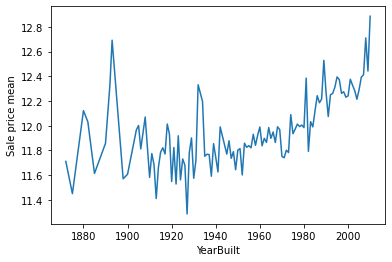

In [50]:
# we plot the mean of target for each "YearBuilt"
df.groupby("YearBuilt")[target].mean().plot()
plt.ylabel("Sale price mean")

Here we see an increasing trend in the target vs. "YearBuilt": the newer houses have higher prices.

Text(0, 0.5, 'Sale price mean')

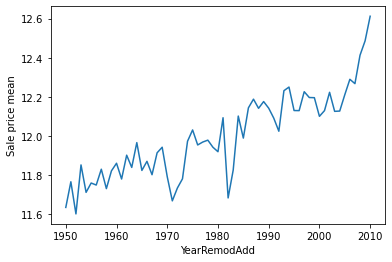

In [51]:
# we plot the mean of target for each "YearRemodAdd"
df.groupby("YearRemodAdd")[target].mean().plot()
plt.ylabel("Sale price mean")

Also here the target increases for the houses which are remodeled later.

For "YearBuilt" and "YearRemodAdd", we engineer new features which are the elapsed years between them and the "YrSold".

In [52]:
df["HouseAge"] = df["YrSold"] - df["YearBuilt"]
df["RemodAge"] = df["YrSold"] - df["YearRemodAdd"]

Text(0, 0.5, 'Sale price mean')

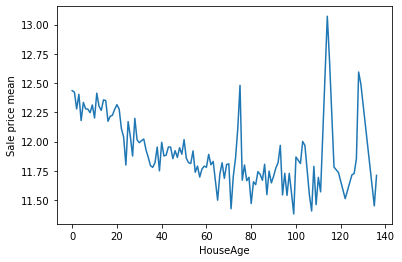

In [53]:
# we plot the mean of target for each "YearRemodAdd"
df.groupby("HouseAge")[target].mean().plot()
plt.ylabel("Sale price mean")

Text(0, 0.5, 'Sale price mean')

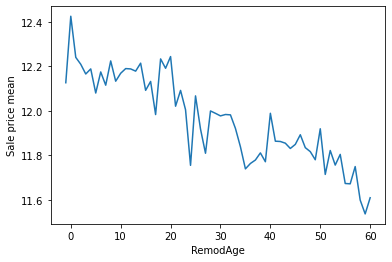

In [54]:
# we plot the mean of target for each "YearRemodAdd"
df.groupby("RemodAge")[target].mean().plot()
plt.ylabel("Sale price mean")

The engineered date columns seem to represent better the relation between the house age and Sale price.

In [55]:
# we create the above new columns in X_train and X_test and  drop the "YrSold" column.
X_train["HouseAge"] = X_train["YrSold"] - X_train["YearBuilt"]
X_test["HouseAge"] = X_test["YrSold"] - X_test["YearBuilt"]
X_train["RemodAge"] = X_train["YrSold"] - X_train["YearRemodAdd"]
X_test["RemodAge"] = X_test["YrSold"] - X_test["YearRemodAdd"]
X_train.drop(columns=["YrSold", "YearRemodAdd", "YearBuilt"], axis =1, inplace=True)
X_test.drop(columns=["YrSold", "YearRemodAdd", "YearBuilt"], axis =1, inplace=True)

Since we have added new features and dropped some of the original features, we redefine the set num_cols for future use

In [56]:
num_cols = []
for col, dtype in X_train.dtypes.to_dict().items():
    if str(dtype) in 'int64' or str(dtype) in 'float64':
        num_cols.append(col)
print("Number of Integer Columns:", len(num_cols))

Number of Integer Columns: 22


# 3. Categorical encoding

Some of the features of our raw dataset may be of the string type (not numbers) which appear in a number of categories. 

We cannot feed such "categorical variables" directly to an ML algorithm, because ML algorithms use numerical variables as input.

Categorical Encoding is the process of converting categorical data into integers.

In this section, we implement the following encoding methods in three parts:

3.1. Label Encoding \
3.2. Count or frequency Encoding \
3.3. One Hot Encoding

In [57]:
# Recall the categorical columns
print(str_cols)

['Alley', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'KitchenQual', 'FireplaceQu', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [58]:
for col in str_cols:
    print(col, X_train[col].unique())

Alley ['Missing' 'Pave' 'Grvl']
LotConfig ['Corner' 'FR2' 'Inside' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['Somerst' 'CollgCr' 'NoRidge' 'NAmes' 'NridgHt' 'Gilbert' 'Veenker'
 'Sawyer' 'Edwards' 'Mitchel' 'BrkSide' 'OldTown' 'Crawfor' 'IDOTRR'
 'Blmngtn' 'MeadowV' 'ClearCr' 'BrDale' 'NWAmes' 'Timber' 'SawyerW'
 'SWISU' 'NPkVill' 'StoneBr' 'Blueste']
BldgType ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
HouseStyle ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '1.5Unf' '2.5Unf' '2.5Fin']
RoofStyle ['Hip' 'Gable' 'Gambrel' 'Flat' 'Mansard' 'Shed']
RoofMatl ['CompShg' 'ClyTile' 'WdShake' 'Tar&Grv' 'WdShngl' 'Metal' 'Roll']
ExterQual ['Ex' 'Gd' 'TA' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Ex']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Stone' 'Wood']
Heating ['GasA' 'GasW' 'OthW' 'Grav']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa']
CentralAir ['Y' 'N']
Electrical ['SBrkr' 'FuseA' 'FuseF' 'FuseP']
BsmtQual ['Ex' 'Gd' 'TA' 'Fa']
BsmtCond ['Gd' 'TA' 'Fa']
BsmtExposure ['No' 'Mn' 'Av' 'Gd']
KitchenQu

### 3.1.a. Label Encoding (using Pandas)

This encoding method amounts to assigning a number to each category.

We observe that the following columns: 
- share a common set of categories which are subsets of ['Gd' 'Missing' 'TA' 'Fa' 'Ex' 'Po'],
- no "extra" category appear in X_test which does not appear in X_train.

Thus, we implement the label encoding for them.

In [59]:
str_cols_ord_encod = ["PoolQC", "GarageCond", "FireplaceQu", "KitchenQual", "BsmtCond", "BsmtQual", "HeatingQC", "ExterCond", "ExterQual"]
for col in str_cols_ord_encod:
    print(col, X_train[col].unique(), X_test[col].unique())

PoolQC ['Missing' 'Gd' 'Fa' 'Ex'] ['Missing' 'Ex' 'Gd' 'Fa']
GarageCond ['TA' 'Fa' 'Po' 'Gd' 'Ex'] ['TA' 'Ex' 'Fa' 'Gd' 'Po']
FireplaceQu ['Gd' 'Missing' 'TA' 'Fa' 'Ex' 'Po'] ['Missing' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
KitchenQual ['Ex' 'Gd' 'TA' 'Fa'] ['TA' 'Gd' 'Ex' 'Fa']
BsmtCond ['Gd' 'TA' 'Fa'] ['TA' 'Fa' 'Gd' 'Po']
BsmtQual ['Ex' 'Gd' 'TA' 'Fa'] ['TA' 'Gd' 'Ex' 'Fa']
HeatingQC ['Ex' 'Gd' 'TA' 'Fa'] ['TA' 'Ex' 'Gd' 'Fa' 'Po']
ExterCond ['TA' 'Gd' 'Fa' 'Ex'] ['TA' 'Gd' 'Fa' 'Po']
ExterQual ['Ex' 'Gd' 'TA' 'Fa'] ['TA' 'Gd' 'Ex' 'Fa']


The label encoding is done in two steps:
- STEP 1: create a dictionary which assigns a number to each category
- STEP 2: use the map() method and apply it to the train and test sets

In [60]:
# STEP 1: we choose the column "FireplaceQu" to create the dictionary, as the categories of other columns in str_cols_ord_encod are subsets of the categories of "FireplaceQu".
encoding_dict= {k:v for v, k in enumerate(X_train['FireplaceQu'].unique(), 0)}
encoding_dict

{'Gd': 0, 'Missing': 1, 'TA': 2, 'Fa': 3, 'Ex': 4, 'Po': 5}

In [61]:
# STEP 2
for col in str_cols_ord_encod:
    X_train[col] = X_train[col].map(encoding_dict)
    X_test[col] = X_test[col].map(encoding_dict)

In [62]:
for col in str_cols_ord_encod:
    print(col, X_train[col].unique()) 

PoolQC [1 0 3 4]
GarageCond [2 3 5 0 4]
FireplaceQu [0 1 2 3 4 5]
KitchenQual [4 0 2 3]
BsmtCond [0 2 3]
BsmtQual [4 0 2 3]
HeatingQC [4 0 2 3]
ExterCond [2 0 3 4]
ExterQual [4 0 2 3]


### 3.1.b. Label Encoding (using Scikit-Learn)
We can also aplly the label encoding method using Scikit-Learn. We do not use it here, however the code is commented below.

In [63]:
# # import the LabelEncoder transformer
# from sklearn.preprocessing import LabelEncoder
# # create an encoder and fit the train data to it
# le = LabelEncoder()
# le.fit(X_train['GarageType'])
# # transform the X_train and X_test using the transform method
# X_train['GarageType'] = le.transform(X_train['GarageType'])
# X_test['GarageType'] = le.transform(X_test['GarageType'])

### 3.2. Count or frequency Encoding 

In this encoding method, we replace each category with the count (or percentage of occurrence) of each category in the dataset.

We apply this method only for the column 'Neighborhood' which contains 25 categories.

In [64]:
# STEP 1: explore the value count of each category in the 'Neighborhood' column using value_counts() 
X_train['Neighborhood'].value_counts()

NAmes      152
CollgCr    107
OldTown     71
Edwards     64
Somerst     62
NridgHt     57
Gilbert     54
Sawyer      53
NWAmes      50
SawyerW     42
BrkSide     40
Crawfor     36
Mitchel     31
NoRidge     31
IDOTRR      24
Timber      22
StoneBr     18
ClearCr     16
SWISU       15
MeadowV     12
Blmngtn     11
BrDale       9
NPkVill      8
Veenker      7
Blueste      2
Name: Neighborhood, dtype: int64

In [65]:
# STEP 2: value_counts() returns a Pandas Series but we need to convert it to a dictionary using to_dict()
Neighborhood_count_dict= X_train['Neighborhood'].value_counts().to_dict()

In [66]:
# STEP 3: OR create the dictionary of frequency of occurrence of the values
Neighborhood_freq_dict= (X_train['Neighborhood'].value_counts() / len(X_train) ).to_dict()

In [67]:
# STEP 4: use the map() method and apply it to the train and test sets
X_train['Neighborhood'] = X_train['Neighborhood'].map(Neighborhood_freq_dict)
X_test['Neighborhood'] = X_test['Neighborhood'].map(Neighborhood_freq_dict)

In [68]:
X_train['Neighborhood'].value_counts()

0.152918    152
0.107646    107
0.071429     71
0.064386     64
0.031187     62
0.062374     62
0.057344     57
0.054326     54
0.053320     53
0.050302     50
0.042254     42
0.040241     40
0.036217     36
0.024145     24
0.022133     22
0.018109     18
0.016097     16
0.015091     15
0.012072     12
0.011066     11
0.009054      9
0.008048      8
0.007042      7
0.002012      2
Name: Neighborhood, dtype: int64

### 3.3. One Hot Encoding (OHE)

This encoding method amounts to creating new columns for each label and filling their values with a boolean 1/0 indicating the presence/absence of that label.

We have already implemented the encoding of 10 categorical columns ('Neighborhood' + 9 columns in str_cols_ord_encod). We will encode the remaining 14 categorical columns using OHE.

In [69]:
str_cols_OHE_encod = list(set(str_cols) - set(str_cols_ord_encod) - set(['Neighborhood']))

### 3.3.a. One Hot Encoding (using Pandas)

OHE can be performed using Pandas and Scikit-learn. We present both methods, however, we implement it on our dataset using Scikit-learn. This is mainly because of the difficulties that arise when trying to perform OHE using Pandas which are explained at the end of this subsection.

In [70]:
# X_train_OHE = pd.get_dummies(X_train[str_cols_OHE_encod])
# X_train = pd.concat([X_train,X_train_OHE], axis=1)
# X_train = X_train.drop(columns=str_cols_OHE_encod, axis=1)

In [71]:
# X_test_OHE = pd.get_dummies(X_test[str_cols_OHE_encod])
# X_test = pd.concat([X_test,X_test_OHE], axis=1)
# X_test = X_test.drop(columns=str_cols_OHE_encod, axis=1)

We obtain different number of columns for X_train and X_test after One Hot Encoding. This is because during train-test split, different number of categories land in train and test datasets. 

### 3.3.b. One Hot Encoding (using Scikit-Learn)

SK-learn takes care of the above problem! 
How does it represent the missing columns in the test dataset? all 0?
The problem with Sklearn is that it renames all the columns by numbering them. So we loose track of the encoded columns.

In [72]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((994, 48), (427, 48), (994,), (427,))

In [73]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse= False, handle_unknown='ignore')
encoder.fit(X_train[str_cols_OHE_encod])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [74]:
# transform the categorical columns in X_train
X_train_transformed = encoder.transform(X_train[str_cols_OHE_encod])
# turned the transformed Numpy array into a Pandas dataframe
X_train_OHE_skl = pd.DataFrame(X_train_transformed)

In [75]:
X_train_OHE_skl

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
990,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
991,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
992,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


As we can see, the new encoded columns are named as integers. However, the names of the features are stored in the get_feature_names() method

In [76]:
encoder.get_feature_names()

array(['x0_1Fam', 'x0_2fmCon', 'x0_Duplex', 'x0_Twnhs', 'x0_TwnhsE',
       'x1_BrkTil', 'x1_CBlock', 'x1_PConc', 'x1_Stone', 'x1_Wood',
       'x2_Gtl', 'x2_Mod', 'x2_Sev', 'x3_N', 'x3_Y', 'x4_Flat',
       'x4_Gable', 'x4_Gambrel', 'x4_Hip', 'x4_Mansard', 'x4_Shed',
       'x5_Av', 'x5_Gd', 'x5_Mn', 'x5_No', 'x6_ClyTile', 'x6_CompShg',
       'x6_Metal', 'x6_Roll', 'x6_Tar&Grv', 'x6_WdShake', 'x6_WdShngl',
       'x7_1.5Fin', 'x7_1.5Unf', 'x7_1Story', 'x7_2.5Fin', 'x7_2.5Unf',
       'x7_2Story', 'x7_SFoyer', 'x7_SLvl', 'x8_FuseA', 'x8_FuseF',
       'x8_FuseP', 'x8_SBrkr', 'x9_Grvl', 'x9_Missing', 'x9_Pave',
       'x10_Gar2', 'x10_Missing', 'x10_Othr', 'x10_Shed', 'x11_Corner',
       'x11_CulDSac', 'x11_FR2', 'x11_FR3', 'x11_Inside', 'x12_GdPrv',
       'x12_GdWo', 'x12_Missing', 'x12_MnPrv', 'x12_MnWw', 'x13_GasA',
       'x13_GasW', 'x13_Grav', 'x13_OthW'], dtype=object)

In [77]:
for col in str_cols_OHE_encod:
    print(col, X_train[col].unique())

BldgType ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Stone' 'Wood']
LandSlope ['Gtl' 'Mod' 'Sev']
CentralAir ['Y' 'N']
RoofStyle ['Hip' 'Gable' 'Gambrel' 'Flat' 'Mansard' 'Shed']
BsmtExposure ['No' 'Mn' 'Av' 'Gd']
RoofMatl ['CompShg' 'ClyTile' 'WdShake' 'Tar&Grv' 'WdShngl' 'Metal' 'Roll']
HouseStyle ['1Story' '2Story' 'SLvl' '1.5Fin' 'SFoyer' '1.5Unf' '2.5Unf' '2.5Fin']
Electrical ['SBrkr' 'FuseA' 'FuseF' 'FuseP']
Alley ['Missing' 'Pave' 'Grvl']
MiscFeature ['Missing' 'Shed' 'Gar2' 'Othr']
LotConfig ['Corner' 'FR2' 'Inside' 'CulDSac' 'FR3']
Fence ['Missing' 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
Heating ['GasA' 'GasW' 'OthW' 'Grav']


In [78]:
# we now create a dummy_cols_list which contains the names of the categorical columns and their category in the format "col_cat"
dummy_cols_list = list(encoder.get_feature_names())
for i in range(0, len(dummy_cols_list)):
    for j in range(0, len(str_cols_OHE_encod)):
        dummy_cols_list[i] = dummy_cols_list[i].replace(f"x{j}_", str_cols_OHE_encod[j]+ "_") 

In [79]:
print(dummy_cols_list)

['BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Stone', 'Foundation_Wood', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'CentralAir_N', 'CentralAir_Y', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_SBrkr', 'Alley_Grvl', 'Alley_Missing', 'Alley_Pave', 'MiscFeature_Gar2', 'MiscFeature_Missing', 'MiscFeature_Othr', 'MiscFeature_Shed', 'LotConfig_Corner', 'Lot

In [80]:
# we rename the dataframe columns to the above names
X_train_OHE_skl.columns = dummy_cols_list

In [81]:
X_train_OHE_skl.head()

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Alley_Grvl,Alley_Missing,Alley_Pave,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Fence_GdPrv,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [82]:
# transform the categorical columns in X_test
X_test_transformed = encoder.transform(X_test[str_cols_OHE_encod])
# turned the transformed Numpy array into a Pandas dataframe
X_test_OHE_skl = pd.DataFrame(X_test_transformed)
# rename the new encoded  columns 
X_test_OHE_skl.columns = dummy_cols_list

In [83]:
X_train_OHE_skl.shape, X_test_OHE_skl.shape

((994, 65), (427, 65))

We observe that although the encoder was fitted to the X_train, the number of encoded features in both X_train and X_test are equal.

We now want to concatenate the original X_train and the encoded X_train_OHE_skl (and then drop the categorical columns from the resulting dataframe).

Before doing pd.concat([X_train,X_train_OHE_skl], axis=1), we need to check if both dataframes have the same index structure

In [84]:
X_train = pd.concat([X_train.reset_index(drop=True), X_train_OHE_skl.reset_index(drop=True)], axis=1)
X_train = X_train.drop(columns=str_cols, axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_OHE_skl.reset_index(drop=True)], axis=1)
X_test = X_test.drop(columns=str_cols, axis=1)

In [85]:
X_train

,GarageCars,GarageArea,OverallCond,LotArea,OpenPorchSF,OverallQual,isNew,TotalBsmtSF,FullBath,GrLivArea,Fireplaces,MoSold,hasGarage,firstFlrSF,WoodDeckSF,TotRmsAbvGrd,Nr.Ring,BsmtFullBath,BedroomAbvGr,secondFlrSF,HalfBath,LotFrontage_median,HouseAge,RemodAge,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,CentralAir_N,CentralAir_Y,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,Alley_Grvl,Alley_Missing,Alley_Pave,MiscFeature_Gar2,MiscFeature_Missing,MiscFeature_Othr,MiscFeature_Shed,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Fence_GdPrv,Fence_GdWo,Fence_Missing,Fence_MnPrv,Fence_MnWw,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW
0,3,788,5,11670,191,9,True,1905,2,1905,1,3,True,1905,0,8,2,0,3,0,0,84.0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,540,5,8633,35,6,True,738,2,1476,0,2,True,738,100,7,2,1,3,738,1,64.0,4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1069,5,16545,126,8,False,1284,2,2450,1,5,True,1310,0,7,2,1,3,1140,1,70.0,11,11,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,384,5,9750,0,5,False,980,2,980,0,10,True,980,68,6,2,0,3,0,0,75.0,39,39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,480,5,3180,166,7,True,600,2,1200,0,6,True,520,0,4,2,0,2,600,1,30.0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,1,216,6,10800,0,4,False,656,2,968,0,8,True,968,0,5,2,0,4,0,0,60.0,80,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
990,2,576,7,7200,0,7,False,596,1,1762,0,10,True,998,36,8,2,1,4,764,1,60.0,86,56,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
991,3,6

In [86]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((994, 89), (427, 89), (994,), (427,))

# 4. Handling Outliers

In statistics, an outlier is a data point that differs significantly from other observations. 

Outliers influence the performance of ML algorithms and may lead to overfitting.

This section, which deals with different ways to handle outliers in our dataset, consists of the following parts:

4.1. Identifying the outliers \
4.2. Outlier trimming \
4.3. Outlier Capping


### 4.1. Identifying the outliers

In this part, we will identify the columns which contain outliers. We first consider all numerical column (num_col) and plot the boxplot for them.

In [87]:
print(num_cols)

['GarageCars', 'GarageArea', 'OverallCond', 'LotArea', 'OpenPorchSF', 'OverallQual', 'TotalBsmtSF', 'FullBath', 'GrLivArea', 'Fireplaces', 'MoSold', 'firstFlrSF', 'WoodDeckSF', 'TotRmsAbvGrd', 'Nr.Ring', 'BsmtFullBath', 'BedroomAbvGr', 'secondFlrSF', 'HalfBath', 'LotFrontage_median', 'HouseAge', 'RemodAge']


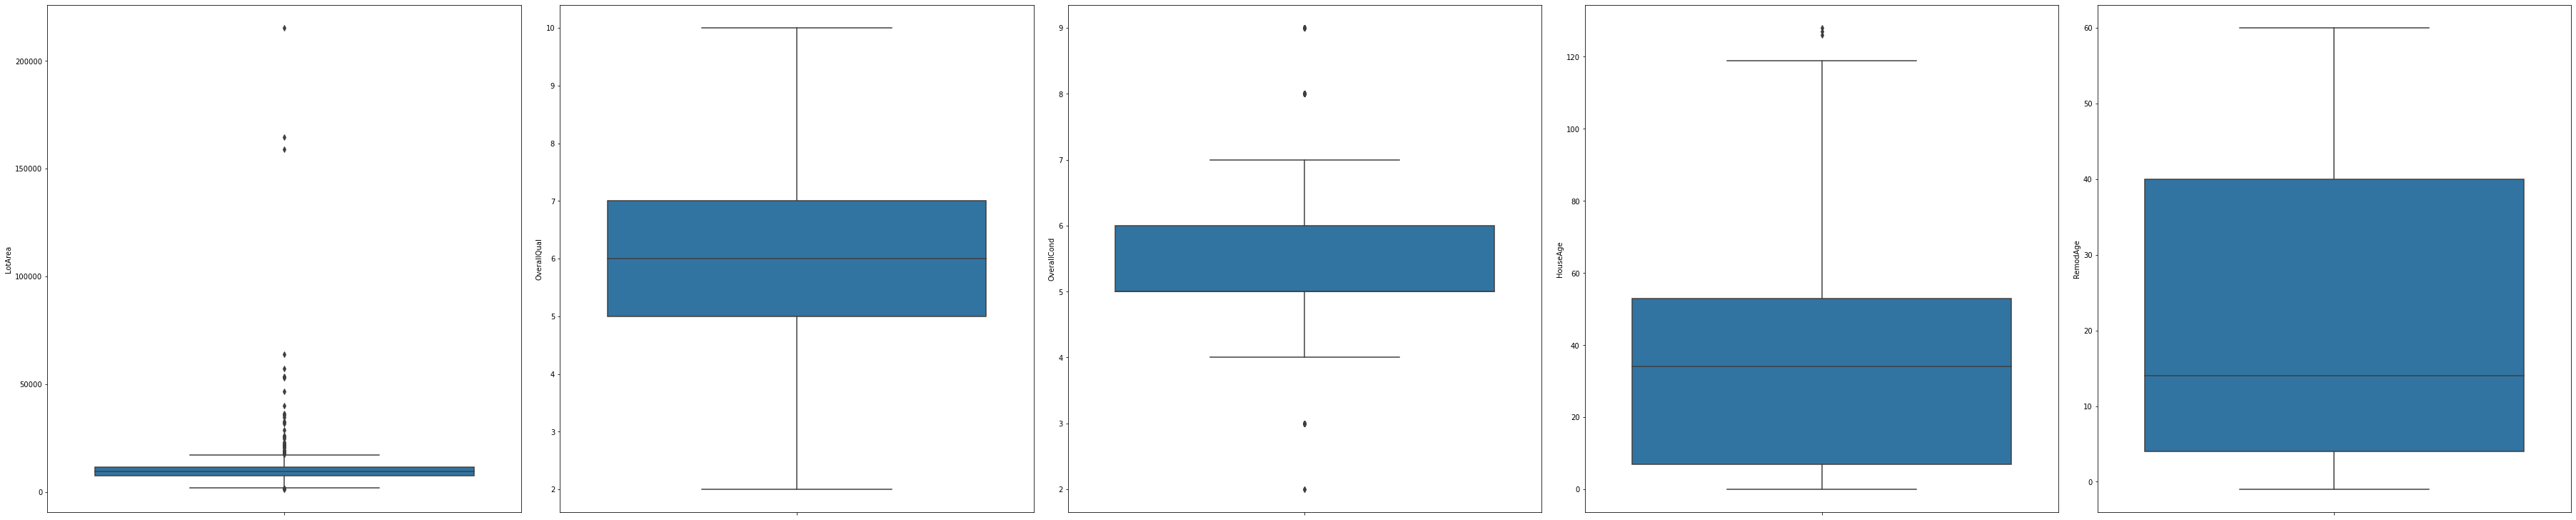

In [88]:
plt.rcParams["figure.figsize"] = (50,10)
fig, axs = plt.subplots(ncols=5, constrained_layout=True)
sns.boxplot(y=X_train['LotArea'], ax=axs[0])
sns.boxplot(y=X_train['OverallQual'], ax=axs[1])
sns.boxplot(y=X_train['OverallCond'], ax=axs[2])
sns.boxplot(y=X_train['HouseAge'], ax=axs[3])
sns.boxplot(y=X_train['RemodAge'], ax=axs[4])
plt.show()


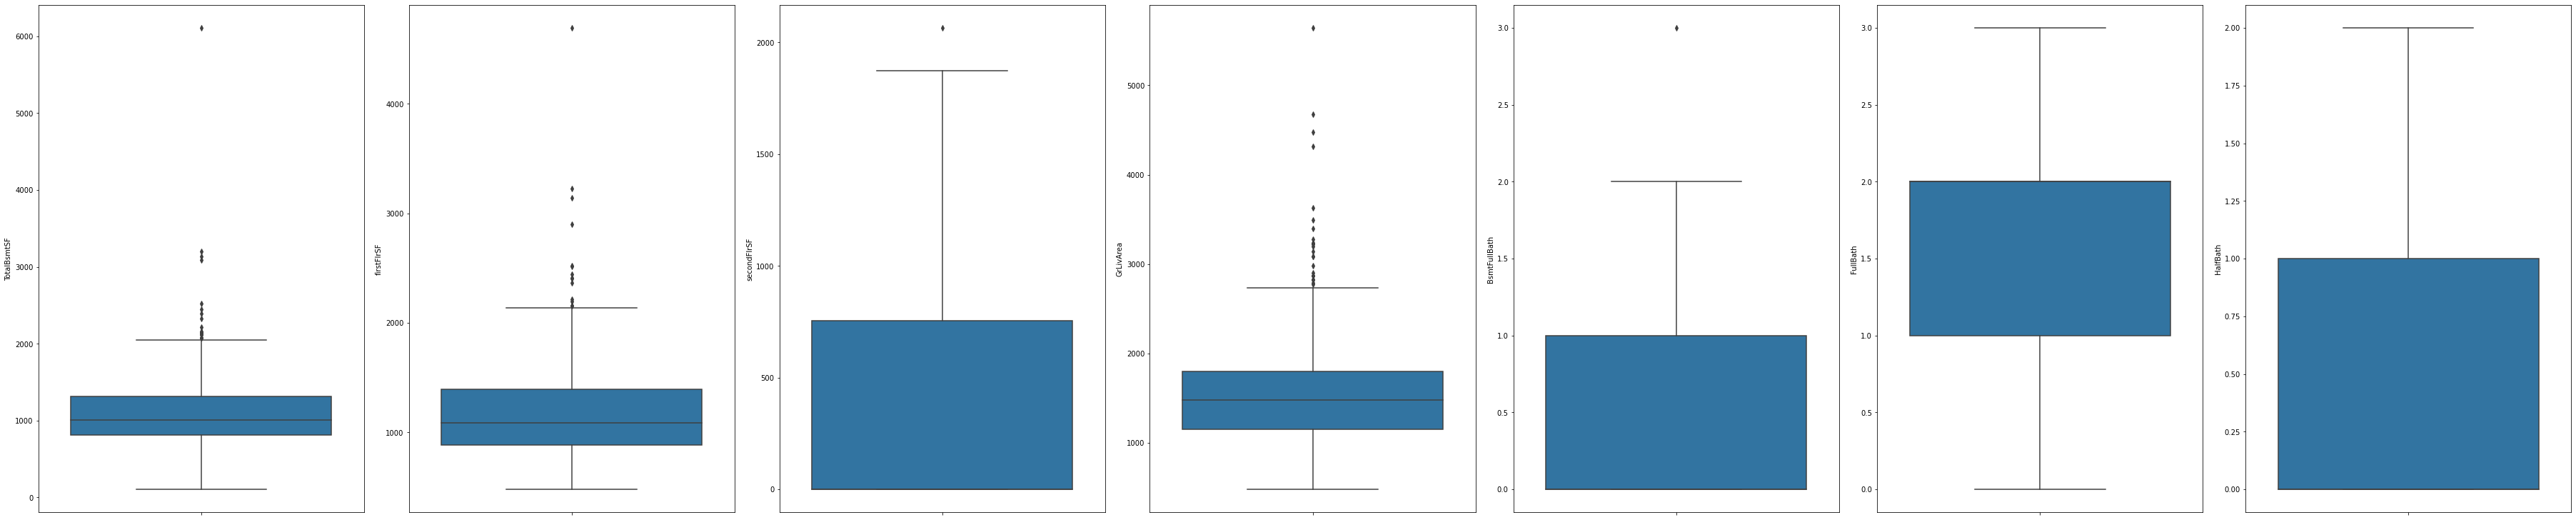

In [89]:
fig, axs = plt.subplots(ncols=7, constrained_layout=True)
sns.boxplot(y=X_train['TotalBsmtSF'], ax=axs[0])
sns.boxplot(y=X_train['firstFlrSF'], ax=axs[1])
sns.boxplot(y=X_train['secondFlrSF'], ax=axs[2])
sns.boxplot(y=X_train['GrLivArea'], ax=axs[3])
sns.boxplot(y=X_train['BsmtFullBath'], ax=axs[4])
sns.boxplot(y=X_train['FullBath'], ax=axs[5])
sns.boxplot(y=X_train['HalfBath'], ax=axs[6])
plt.rcParams["figure.figsize"] = (50,10)
plt.show()

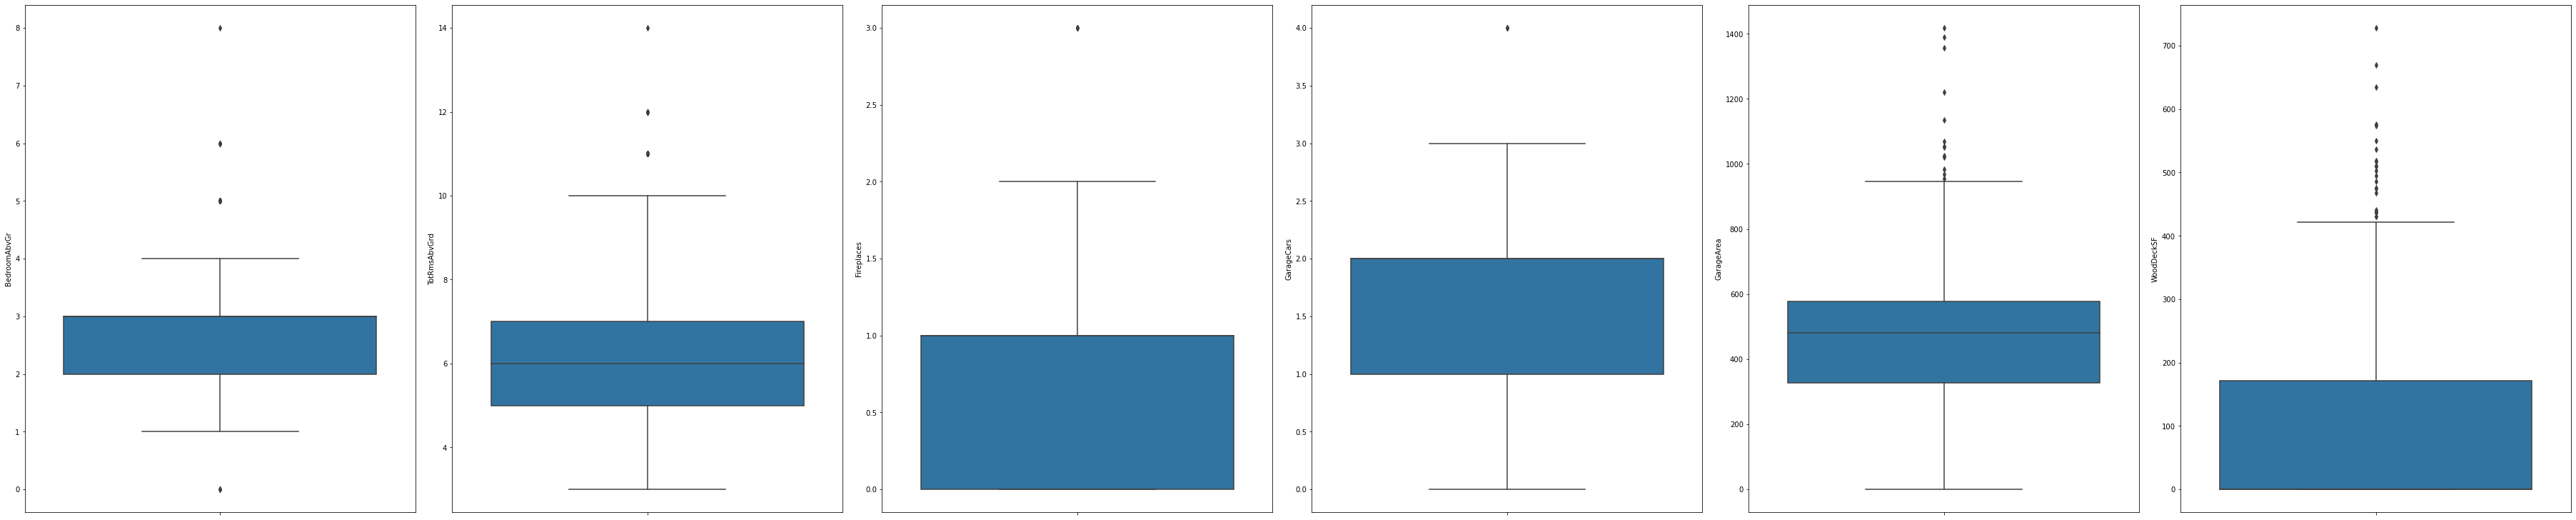

In [90]:
fig, axs = plt.subplots(ncols=6, constrained_layout=True)
sns.boxplot(y=X_train['BedroomAbvGr'], ax=axs[0])
sns.boxplot(y=X_train['TotRmsAbvGrd'], ax=axs[1])
sns.boxplot(y=X_train['Fireplaces'], ax=axs[2])
sns.boxplot(y=X_train['GarageCars'], ax=axs[3])
sns.boxplot(y=X_train['GarageArea'], ax=axs[4])
sns.boxplot(y=X_train['WoodDeckSF'], ax=axs[5])
plt.rcParams["figure.figsize"] = (50,10)
plt.show()

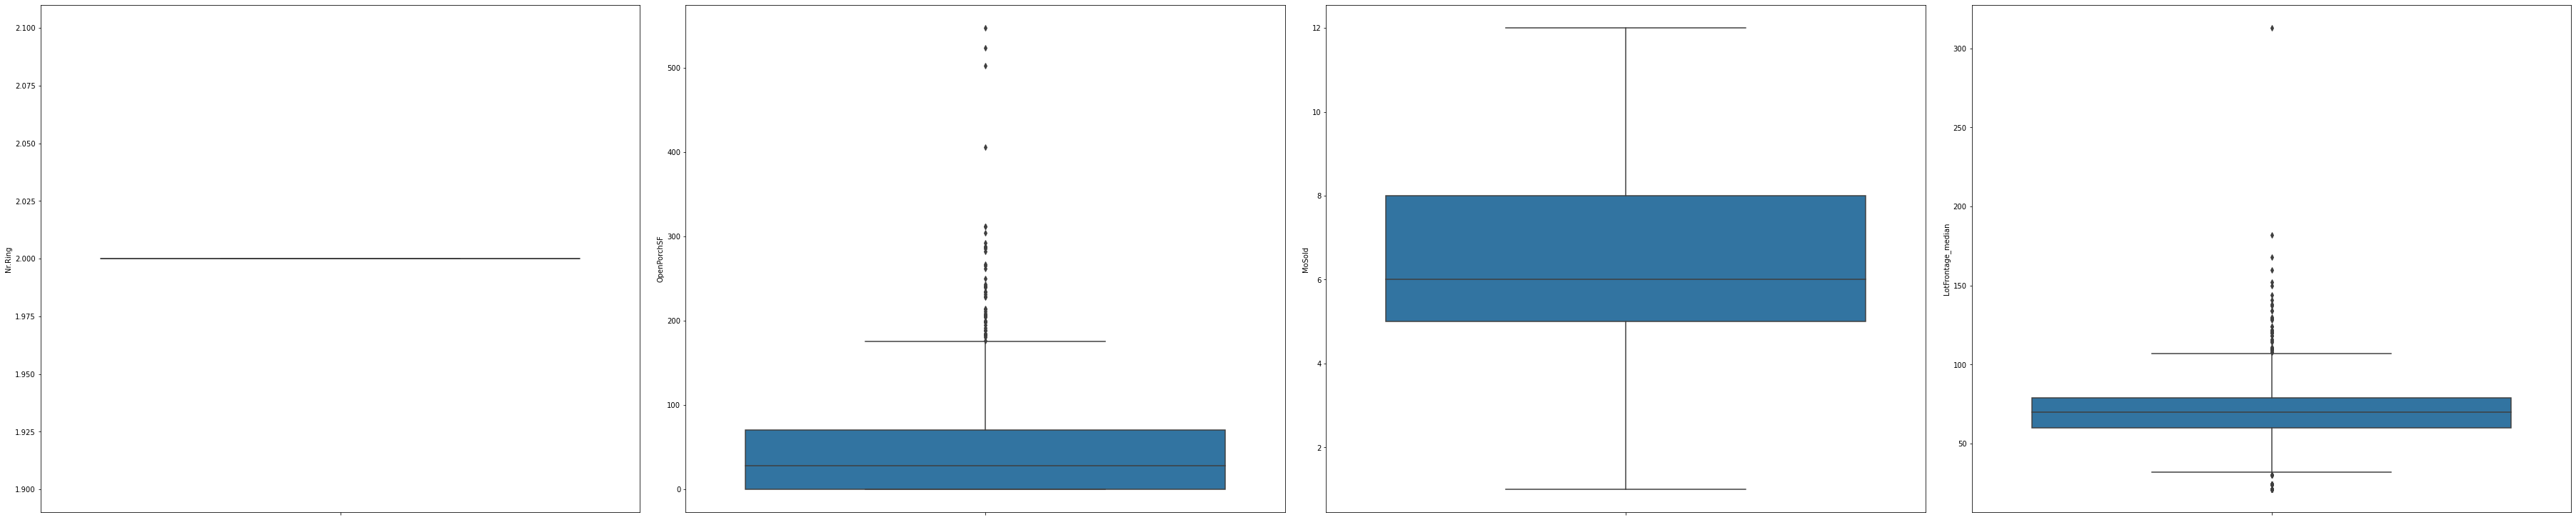

In [91]:
fig, axs = plt.subplots(ncols=4, constrained_layout=True)
sns.boxplot(y=X_train['Nr.Ring'], ax=axs[0])
sns.boxplot(y=X_train['OpenPorchSF'], ax=axs[1])
sns.boxplot(y=X_train['MoSold'], ax=axs[2])
sns.boxplot(y=X_train['LotFrontage_median'], ax=axs[3])
plt.rcParams["figure.figsize"] = (50,10)
plt.show()

Before we determine the outliers for all columns, we focus on two example columns:
- 'LotFrontage' which obviously contains outliers 
- 'MoSold' without outliers, as can be seen in the boxplot

<AxesSubplot:ylabel='MoSold'>

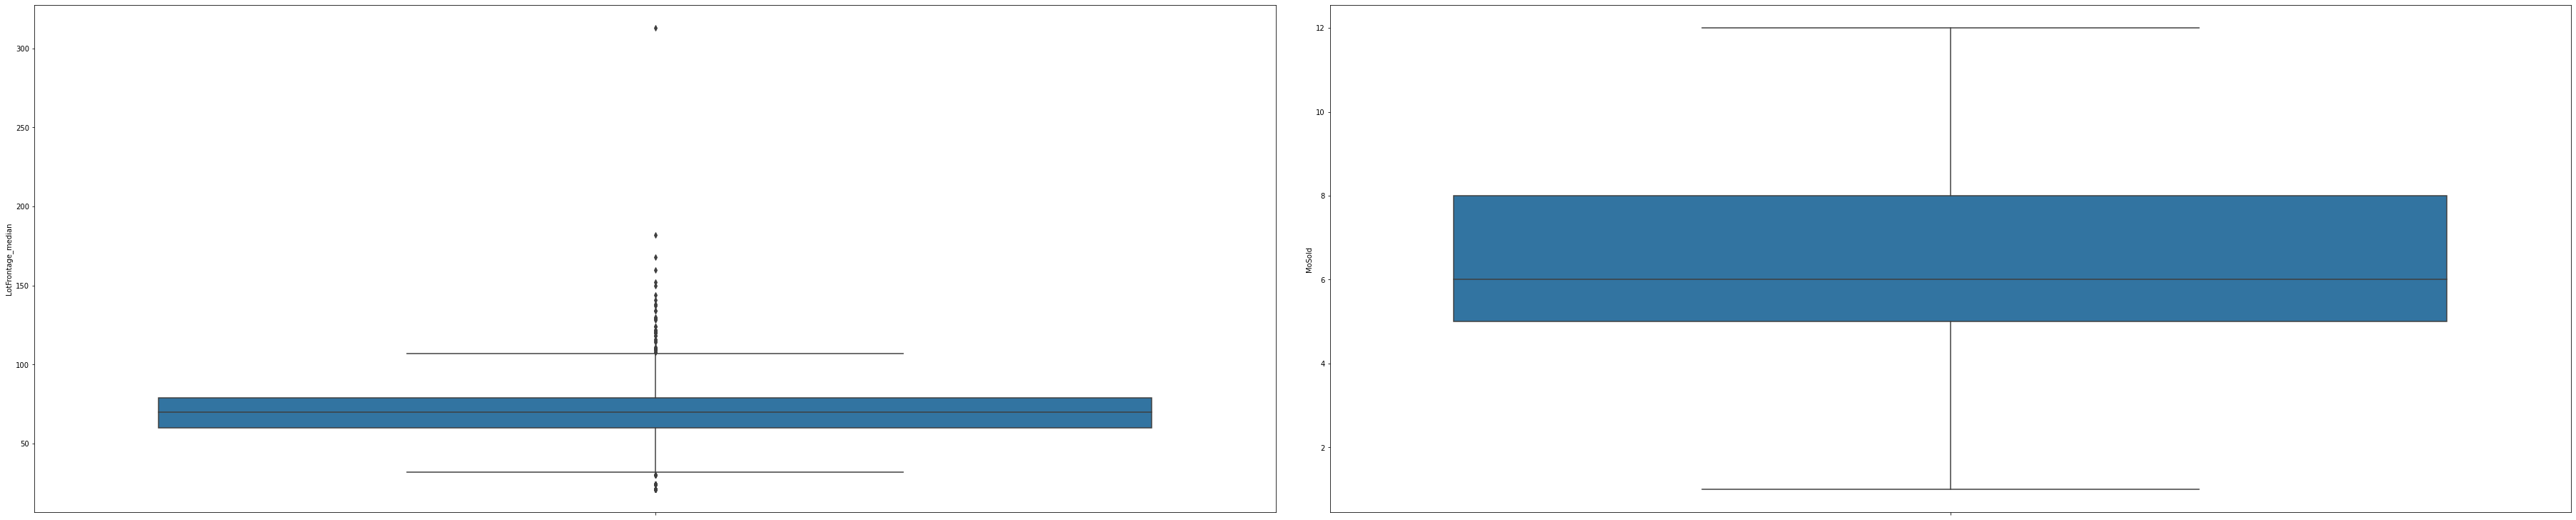

In [92]:
fig, axs = plt.subplots(ncols=2, constrained_layout=True)
sns.boxplot(y=X_train['LotFrontage_median'], ax=axs[0])
sns.boxplot(y=X_train['MoSold'], ax=axs[1])

In [93]:
# STEP1: Calculate the IQR, lower_boundary and upper_boundary for
# 'LotFrontage'
LotFrontage_IQR = X_train['LotFrontage_median'].quantile(0.75) - X_train['LotFrontage_median'].quantile(0.25)
LotFrontage_lower_boundary = X_train['LotFrontage_median'].quantile(0.25) - (LotFrontage_IQR * 1.5)
LotFrontage_upper_boundary = X_train['LotFrontage_median'].quantile(0.75) + (LotFrontage_IQR * 1.5) 
# 'MoSold'
MoSold_IQR = X_train['MoSold'].quantile(0.75) - X_train['MoSold'].quantile(0.25)
MoSold_lower_boundary = X_train['MoSold'].quantile(0.25) - (MoSold_IQR * 1.5)
MoSold_upper_boundary = X_train['MoSold'].quantile(0.75) + (MoSold_IQR * 1.5) 

In [94]:
print('LotFrontage_upper_boundary: ' ,LotFrontage_upper_boundary)
print('LotFrontage_IQR:', LotFrontage_IQR)
print('LotFrontage_lower_boundary:' ,LotFrontage_lower_boundary)

print('MoSold_upper_boundary: ' ,MoSold_upper_boundary)
print('MoSold_IQR:', MoSold_IQR)
print('MoSold_lower_boundary:' ,MoSold_lower_boundary)

LotFrontage_upper_boundary:  107.5
LotFrontage_IQR: 19.0
LotFrontage_lower_boundary: 31.5
MoSold_upper_boundary:  12.5
MoSold_IQR: 3.0
MoSold_lower_boundary: 0.5


In [95]:
# STEP 2: lagging the outliers:
# Create a list with boolean values indicating whether each record in the considered column is an outlier (True) or not (False) 
LotFrontage_outliers_list = np.where(X_train['LotFrontage_median'] > LotFrontage_upper_boundary, True,
                       np.where(X_train['LotFrontage_median'] < LotFrontage_lower_boundary, True, False))

MoSold_outliers_list = np.where(X_train['MoSold'] > MoSold_upper_boundary, True,
                       np.where(X_train['MoSold'] < MoSold_lower_boundary, True, False))

#Percentage of outliers
print('Percentage of outliers in LotFrontage: ', LotFrontage_outliers_list.mean())
print('Percentage of outliers in MoSold: ', MoSold_outliers_list.mean())

Percentage of outliers in LotFrontage:  0.07243460764587525
Percentage of outliers in MoSold:  0.0


The above result confirms our observation from the boxplots. Now we create a list of all columns which contain outliers.

In [96]:
outlier_cols = ["LotArea", "OverallQual", "OverallCond", "YearBuilt", "TotalBsmtSF", "firstFlrSF", "secondFlrSF", "GrLivArea", "BsmtFullBath",
  "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF",  "OpenPorchSF", "BedroomAbvGr"]

In [97]:
# Now we repeat the same steps for all the columns with outliers
# We first create the following dictionaries
IQR_dict= {}
for col in num_cols:
    IQR_dict[f"{col}_IQR"] = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)

lower_boundary_dict= {}
for col in num_cols:
    lower_boundary_dict[f"{col}_lower_boundary"] = X_train[col].quantile(0.25) - (IQR_dict[f"{col}_IQR"] * 1.6)

upper_boundary_dict= {}
for col in num_cols:
    upper_boundary_dict[f"{col}_upper_boundary"] = X_train[col].quantile(0.25) + (IQR_dict[f"{col}_IQR"] * 1.6)

columns_outliers_dict={}
for col in num_cols:
    columns_outliers_dict[f"{col}_outliers_list"] = np.where(X_train[col] > upper_boundary_dict[f"{col}_upper_boundary"], True,
                       np.where(X_train[col] < lower_boundary_dict[f"{col}_lower_boundary"], True, False))

In [98]:
print(" >>IQR_dict: ", IQR_dict)
print(" >>lower_boundary_dict: ", lower_boundary_dict)
print(" >>upper_boundary_dict: ", upper_boundary_dict)

 >>IQR_dict:  {'GarageCars_IQR': 1.0, 'GarageArea_IQR': 250.5, 'OverallCond_IQR': 1.0, 'LotArea_IQR': 3903.5, 'OpenPorchSF_IQR': 70.0, 'OverallQual_IQR': 2.0, 'TotalBsmtSF_IQR': 493.75, 'FullBath_IQR': 1.0, 'GrLivArea_IQR': 644.5, 'Fireplaces_IQR': 1.0, 'MoSold_IQR': 3.0, 'firstFlrSF_IQR': 504.25, 'WoodDeckSF_IQR': 171.0, 'TotRmsAbvGrd_IQR': 2.0, 'Nr.Ring_IQR': 0.0, 'BsmtFullBath_IQR': 1.0, 'BedroomAbvGr_IQR': 1.0, 'secondFlrSF_IQR': 755.0, 'HalfBath_IQR': 1.0, 'LotFrontage_median_IQR': 19.0, 'HouseAge_IQR': 46.0, 'RemodAge_IQR': 36.0}
 >>lower_boundary_dict:  {'GarageCars_lower_boundary': -0.6000000000000001, 'GarageArea_lower_boundary': -73.55000000000001, 'OverallCond_lower_boundary': 3.4, 'LotArea_lower_boundary': 1432.3999999999996, 'OpenPorchSF_lower_boundary': -112.0, 'OverallQual_lower_boundary': 1.7999999999999998, 'TotalBsmtSF_lower_boundary': 26.0, 'FullBath_lower_boundary': -0.6000000000000001, 'GrLivArea_lower_boundary': 119.29999999999995, 'Fireplaces_lower_boundary': -1.

In [99]:
outlier_cols = [col for col in num_cols if  columns_outliers_dict[f"{col}_outliers_list"].mean() > 0 ] 
print(outlier_cols)
print(len(outlier_cols))

['GarageCars', 'GarageArea', 'OverallCond', 'LotArea', 'OpenPorchSF', 'OverallQual', 'TotalBsmtSF', 'FullBath', 'GrLivArea', 'Fireplaces', 'MoSold', 'firstFlrSF', 'WoodDeckSF', 'TotRmsAbvGrd', 'BsmtFullBath', 'BedroomAbvGr', 'secondFlrSF', 'HalfBath', 'LotFrontage_median', 'HouseAge']
20


In [100]:
for col in outlier_cols:
    print(f"Percentage of outliers in {col}: ", round(columns_outliers_dict[f"{col}_outliers_list"].mean(), 3))

Percentage of outliers in GarageCars:  0.134
Percentage of outliers in GarageArea:  0.111
Percentage of outliers in OverallCond:  0.214
Percentage of outliers in LotArea:  0.114
Percentage of outliers in OpenPorchSF:  0.144
Percentage of outliers in OverallQual:  0.044
Percentage of outliers in TotalBsmtSF:  0.104
Percentage of outliers in FullBath:  0.025
Percentage of outliers in GrLivArea:  0.106
Percentage of outliers in Fireplaces:  0.082
Percentage of outliers in MoSold:  0.157
Percentage of outliers in firstFlrSF:  0.096
Percentage of outliers in WoodDeckSF:  0.091
Percentage of outliers in TotRmsAbvGrd:  0.113
Percentage of outliers in BsmtFullBath:  0.012
Percentage of outliers in BedroomAbvGr:  0.172
Percentage of outliers in secondFlrSF:  0.038
Percentage of outliers in HalfBath:  0.01
Percentage of outliers in LotFrontage_median:  0.142
Percentage of outliers in HouseAge:  0.123


### 4.2. Outlier trimming
This method amounts to dropping all the records which include an outlier (in X_train).

We first begin by trimming the outliers of the column "LotFrontage_median", as an example.

In [101]:
X_train_trimmed = X_train.loc[~LotFrontage_outliers_list, ]
X_train.shape, X_train_trimmed.shape

((994, 89), (922, 89))

We observe that after trimming the outliers in "LotFrontage_median", the dataset size is reduced by 2 records.

In [102]:
# Here we recheck the percentage of the outliers after trimming
LotFrontage_trimmed_outliers = np.where(X_train_trimmed['LotFrontage_median'] > LotFrontage_upper_boundary, True,
                       np.where(X_train_trimmed['LotFrontage_median'] < LotFrontage_lower_boundary, True, False))

#Percentage of outliers after trimming
print('Percentage of outliers in LotFrontage after trimming: ', LotFrontage_trimmed_outliers.mean())

Percentage of outliers in LotFrontage after trimming:  0.0


We now implement the outlier trimming on all columns whose percentage of outliers is less than a threshold.

In [103]:
outlier_trim_threshold = 0.05
# create a list of columns which have smaller percentage than outlier_trim_threshold 
outlier_trim_cols = [col for col in outlier_cols if columns_outliers_dict[f"{col}_outliers_list"].mean() < outlier_trim_threshold ] 

print(outlier_trim_cols)

['OverallQual', 'FullBath', 'BsmtFullBath', 'secondFlrSF', 'HalfBath']


In [104]:
X_train = X_train.loc[~(
+ columns_outliers_dict["OverallQual_outliers_list"]
+ columns_outliers_dict["HalfBath_outliers_list"]
+ columns_outliers_dict["secondFlrSF_outliers_list"]
+ columns_outliers_dict["BsmtFullBath_outliers_list"] 
+ columns_outliers_dict["FullBath_outliers_list"]
), 
]

In [105]:
y_train = y_train.loc[~(
+ columns_outliers_dict["OverallQual_outliers_list"]
+ columns_outliers_dict["HalfBath_outliers_list"]
+ columns_outliers_dict["secondFlrSF_outliers_list"]
+ columns_outliers_dict["BsmtFullBath_outliers_list"] 
+ columns_outliers_dict["FullBath_outliers_list"]
), 
]

In [106]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((896, 89), (427, 89), (896,), (427,))

In [107]:
print("We observe that after outlier trimming, the number of records is reduced to", X_train.shape[0],".")

We observe that after outlier trimming, the number of records is reduced to 896 .


### 4.2. Outlier Capping
In this method, we replace the outliers at both tails (or one of the tails) by the maximum and minimum limits, respectively.

In [108]:
# For the rest of columns with outliers, we implement the outlier capping method.
outlier_cap_cols = list(set(outlier_cols) - set(outlier_trim_cols)) 
print(outlier_cap_cols)

['LotFrontage_median', 'GarageCars', 'GarageArea', 'TotRmsAbvGrd', 'OverallCond', 'GrLivArea', 'LotArea', 'Fireplaces', 'HouseAge', 'MoSold', 'OpenPorchSF', 'BedroomAbvGr', 'WoodDeckSF', 'TotalBsmtSF', 'firstFlrSF']


In [109]:
for col in outlier_cap_cols:
    X_train[col] = np.where(X_train[col] > upper_boundary_dict[f"{col}_upper_boundary"], upper_boundary_dict[f"{col}_upper_boundary"],
                         np.where(X_train[col] < lower_boundary_dict[f"{col}_lower_boundary"], lower_boundary_dict[f"{col}_lower_boundary"], X_train[col]))

In [110]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((896, 89), (427, 89), (896,), (427,))

We observe that the after outlier capping the dataset size does not change.

# 5. Feature Scaling

- Feature scaling is a method to normalize the magnitude of features. 
- The magnitude of the features is important in training many ML model:
-- values with larger magnitude may dominant the ones with smaller magnitude while learning
-- faster convergence of gradient descent when features are on similar scales

This section consists of two parts:
 
5.2. Standardization \
5.2. Min-Max Scaling

In this notebook, we perform the min-max scaling. However, we present the commented code for the standardization as well.

### 5.1. Standardization
In the standardization, we transform all the valuesto a scale between 0 and 1 by performing the following transformation

$X_{scaled}(X) = \frac{X -  \bar{X}}{\sigma}$


In [111]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### 5.2. Min-Max Scaling

In the Min-Max scaling, we transform all the values to a scale between 0 and 1 by performing the following transformation

$X_{scaled}(X) = \frac{X -  X_{min}}{X_{max} - X_{min}}$

In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Feature Selection

Feature selection is the process of finding a subset of features which are the most predictive ones for the chosen ML algorithm. 

WHY Feature selection?
- Makes models simpler to understand and interpret 
- Reduces training time
- Reduces overfitting 
- Avoids data redundancy

In this section, we perform the following methods of feature selection:

6.1. Dropping Constant Features \
6.2. Correlation-based Feature Selection\
6.2.a Selecting Features with low correlations with other features\
6.2.a Selecting Features with hight correlations with Target

We are almost done with preprocessing. In fact, we have done the data cleaning and feature engineering part: all the columns have numerical values, have no Null values, have no outliers, are on the same scale.

This way we have reduces the data size by dropping a chunk of rows. 

However, there are now too many features in our dataset.
Now it is time to reduce the dimensionality of our dataset by dropping unnecessary columns which do not contribute to the prediction of the target.

In [113]:
len(X_train.columns)

89

### 6.1. Dropping Constant Features
We first identify the features with constant values and drop them, since they have no predictive power.

In [114]:
const_feat = [X for X in X_train.columns if X_train[X].nunique() == 1]
const_feat

['Nr.Ring', 'RoofStyle_Shed', 'RoofMatl_ClyTile']

In [115]:
X_train.drop(labels=const_feat, axis=1, inplace= True)
X_test.drop(labels=const_feat, axis=1, inplace= True)

In [116]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((896, 86), (427, 86), (896,), (427,))

In [117]:
print("We observe that the number of features is reduced to", X_train.shape[1])  

We observe that the number of features is reduced to 86


### 6.2. Correlation-based Feature Selection

After removing constant features, we remove those features which are highly correlated, based on the following criteria:

- "Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other" M A.Hall, 1999

### 6.2.a Selecting Features with low correlations with other features
Example: GarageCars and GarageArea are probably correlated

<AxesSubplot:>

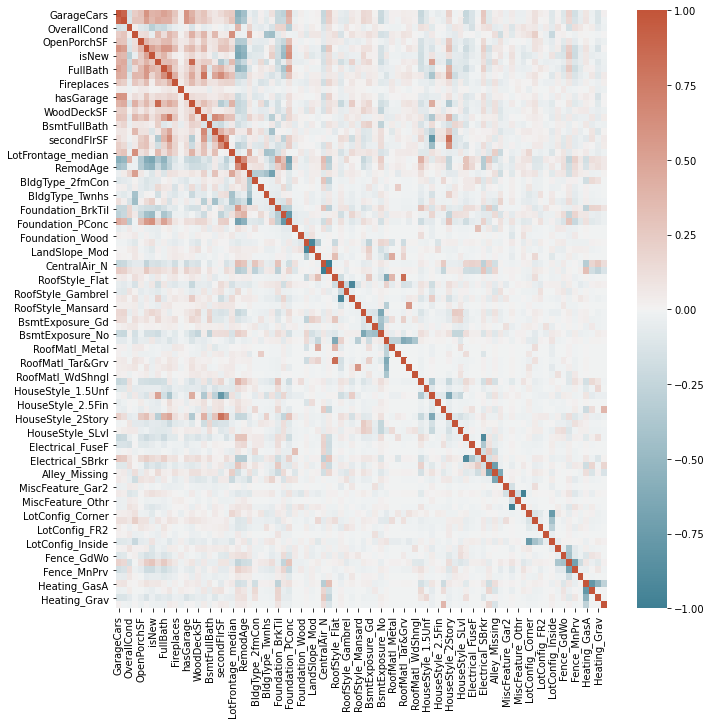

In [118]:
# plotting the correlation diagram of X_train
corrmat = X_train.corr(method='pearson')

cmap = sns.diverging_palette(220, 20, as_cmap=True)

fig, ax = plt.subplots()
fig.set_size_inches(11,11)

sns.heatmap(corrmat, cmap=cmap)

In [119]:
intercorr_threshold = 0.65
# creating a set of column pairs whose correlation is higher than intercorr_threshold
col_corr = set()
corr_matrix = X_train.corr()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > intercorr_threshold: 
            print(abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j])
            colname = corr_matrix.columns[j]
            col_corr.add(colname)

0.8941463538929487 GarageArea GarageCars
0.8693579924934365 firstFlrSF TotalBsmtSF
0.7955348055869929 TotRmsAbvGrd GrLivArea
0.6603603927603625 BedroomAbvGr TotRmsAbvGrd
0.6528463588336926 secondFlrSF GrLivArea
0.6599467437309584 HouseAge isNew
0.6964670166357704 BldgType_TwnhsE BldgType_1Fam
0.6959121973500262 Foundation_PConc HouseAge
0.7792726318697688 Foundation_PConc Foundation_CBlock
0.9387184455054185 LandSlope_Mod LandSlope_Gtl
0.9999999999999997 CentralAir_Y CentralAir_N
0.9270033110737551 RoofStyle_Hip RoofStyle_Gable
0.844205176097046 RoofMatl_Tar&Grv RoofStyle_Flat
0.7949268160073627 HouseStyle_1Story secondFlrSF
0.8243642517166129 HouseStyle_2Story secondFlrSF
0.9009798587550962 Electrical_SBrkr Electrical_FuseA
0.7331931903224824 Alley_Missing Alley_Grvl
0.6561551719251224 Alley_Pave Alley_Missing
0.971467254556455 MiscFeature_Shed MiscFeature_Missing
0.7557792357060696 LotConfig_Inside LotConfig_Corner
0.6987486775837685 Fence_MnPrv Fence_Missing
0.7822529079010264 Heati

In [120]:
len(set(col_corr))

20

In [121]:
# dropping one of the columns in each pair in col_corr in X_train and X_test
X_train.drop(labels=col_corr, axis=1, inplace=True)
X_test.drop(labels=col_corr, axis=1, inplace=True)

X_train.shape, X_test.shape

((896, 66), (427, 66))

In [122]:
print("We observe that the number of features is reduced to", X_train.shape[1])

We observe that the number of features is reduced to 66


### 6.2. Selecting Features with hight correlations with Target

In [123]:
# We first add the target (y_train) to the Features (X_train) to be able to calculate the correlation matrix between them
df_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis = 1)

# create the correlation matrix
cor_mat = df_train.corr()

# Add a column which contains the sorted absolute values of corr(X_train, y_train)
cor_mat["X-Y_corr"]= cor_mat[target].abs().sort_values(ascending=False)

In [124]:
cor_mat["X-Y_corr"]

GarageArea      0.635103
OverallCond     0.045567
LotArea         0.393027
OpenPorchSF     0.415512
OverallQual     0.768556
                  ...   
Fence_MnWw      0.058026
Heating_GasW    0.019617
Heating_Grav    0.172726
Heating_OthW    0.020212
SalePrice       1.000000
Name: X-Y_corr, Length: 67, dtype: float64

In [125]:
target_feature_corr_threshold = 0.1
# collect all the features with corr(X_train, y_train) > target_feature_corr_threshold into a list
final_cols = cor_mat[cor_mat["X-Y_corr"] > target_feature_corr_threshold].index.values.tolist()
final_cols = list(set(final_cols) - set(["Id", target]))

In [126]:
print("The total number of selected features: ", len(final_cols))

The total number of selected features:  31


In [127]:
# replacing the columns in X_train and X_test with final_cols
X_train = X_train[final_cols]
X_test = X_test[final_cols]

In [128]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((896, 31), (896,), (427, 31), (427,))

In [129]:
print("We observe that the number of features is reduced to", X_train.shape[1])

We observe that the number of features is reduced to 31


# 7. Saving the preprocessed data

In [130]:
X_train.to_csv("../datasets/regression/processed/X_train.csv", sep = ",", encoding= "utf-8")
X_test.to_csv("../datasets/regression/processed/X_test.csv", sep = ",", encoding= "utf-8")
y_train.to_csv("../datasets/regression/processed/y_train.csv", sep = ",", encoding= "utf-8")
y_test.to_csv("../datasets/regression/processed/y_test.csv", sep = ",", encoding= "utf-8")